In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("bank_marketing_updated_v1.csv",header =2)

In [3]:
data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [5]:
data["age"].mean()

40.93565090394105

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data.drop("customerid",axis=1 , inplace=True)

In [8]:
data.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [9]:
data['job']=data.jobedu.apply(lambda x: x.split(",")[0])

In [10]:
data.head(2)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician


In [11]:
data['education']=data.jobedu.apply(lambda x: x.split(",")[1])

In [12]:
data.drop('jobedu',axis=1,inplace=True)

In [13]:
data.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary


In [14]:
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [15]:
data.response

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45211, dtype: object

In [16]:
100/45210

0.0022119000221190004

In [17]:
### Most  Popular Thios

In [18]:
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [19]:
data.age.isna().sum()

20

In [20]:
data.shape

(45211, 19)

In [21]:
20*100/45211

0.04423702196368141

In [22]:
data=data[-data.age.isnull()]

In [23]:
data.age.isna().sum()

0

In [24]:
data[data.month.isna()]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [25]:
data.month.value_counts()

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [26]:
data_mode=data.month.mode()[0]

In [27]:
data.month.fillna(data_mode,inplace=True)

In [28]:
data.month.value_counts(normalize= True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [29]:
data.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [30]:
data.loc[data.pdays<0,'pdays']=np.NaN

In [31]:
data.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [32]:
data=data[-(data.response.isnull())]

In [33]:
#### Age Variable
data.head(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [34]:
data.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

(array([ 1336., 11733., 12909.,  8007.,  7058.,  3310.,   375.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

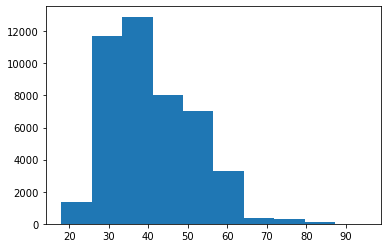

In [35]:
plt.hist(data.age)

<function matplotlib.pyplot.show(close=None, block=None)>

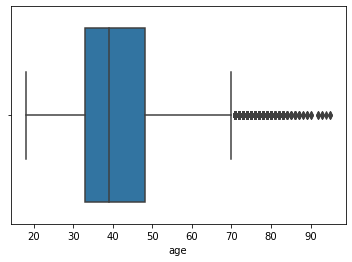

In [36]:
sns.boxplot(data.age)
plt.show

In [37]:
###balance

In [38]:
data.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

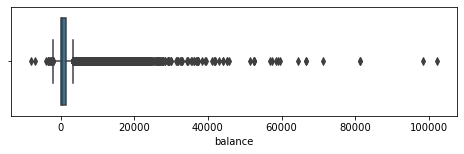

In [39]:
plt.figure(figsize=[8,2])
sns.boxplot(data.balance)
plt.show()

In [40]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x24d1d1795b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d1d179c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d1d179220>],
 'medians': [<matplotlib.lines.Line2D at 0x24d1d186370>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d1d1866d0>],
 'means': []}

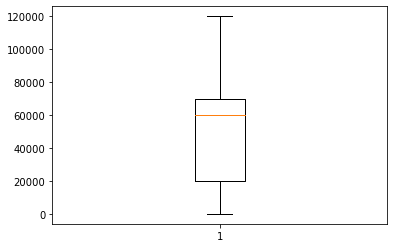

In [41]:
plt.boxplot(data.salary)

In [42]:
data.duration


0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45161, dtype: object

In [43]:
data.isna().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36915
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

In [44]:
data[data.pdays<0]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education


In [45]:
# Numerical to Numerical 

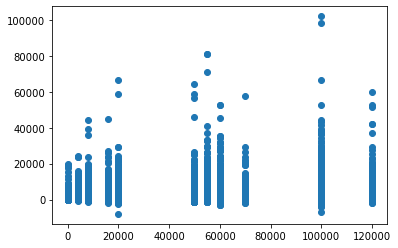

In [46]:
plt.scatter(data.salary,data.balance)
plt.show()

<AxesSubplot:xlabel='salary', ylabel='age'>

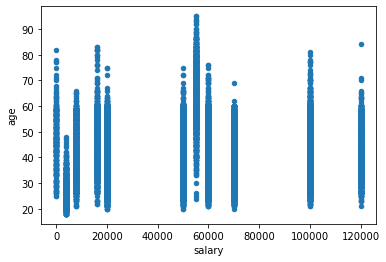

In [47]:
data.plot.scatter(x='salary',y='age')

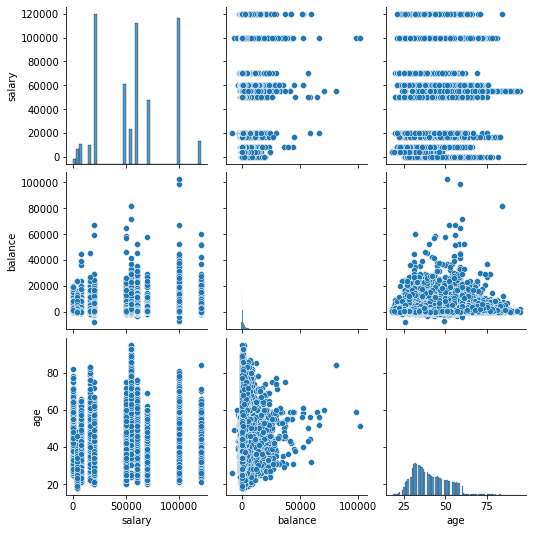

In [48]:
sns.pairplot(data=data , vars=['salary','balance','age'])
plt.show()

In [49]:
data[['salary','balance','age']].corr()

,salary,balance,age
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


<AxesSubplot:>

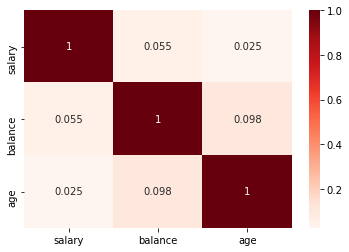

In [50]:
sns.heatmap(data[['salary','balance','age']].corr(),annot=True , cmap='Reds')

In [51]:
# categorical numerical 

In [52]:
data.groupby(by='response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

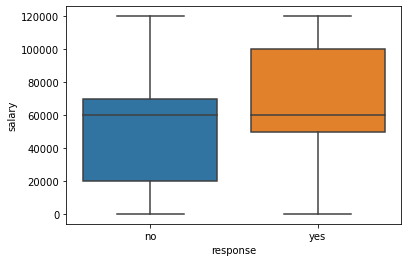

In [53]:
sns.boxplot(data=data, x='response',y='salary')
plt.show

In [54]:
### Response vs balance

<AxesSubplot:xlabel='response', ylabel='balance'>

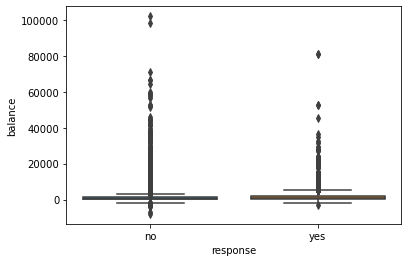

In [55]:
sns.boxplot(data=data, x='response',y='balance')

In [56]:
data.groupby(by='response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [57]:
data.groupby(by='response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

In [58]:
def p75(x):
    return np.quantile(x,0.75)

In [59]:
data.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


<AxesSubplot:xlabel='response'>

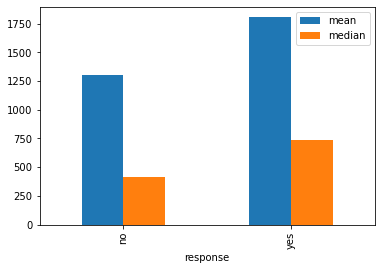

In [60]:
data.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()

<AxesSubplot:xlabel='education'>

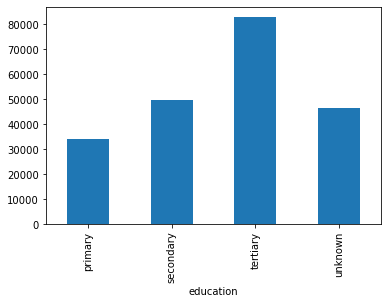

In [61]:
data.groupby(by='education')['salary'].mean().plot.bar()

<AxesSubplot:xlabel='education'>

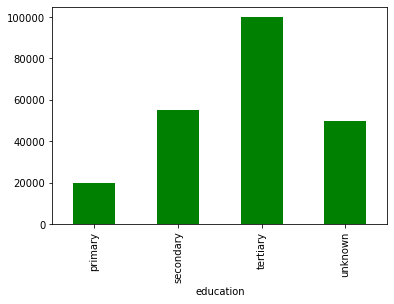

In [62]:
data.groupby(by='education')['salary'].median().plot.bar(color='green')

<AxesSubplot:xlabel='job'>

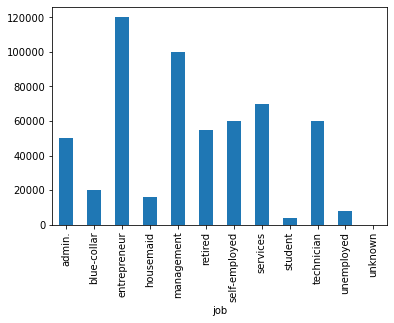

In [63]:
data.groupby(by='job')['salary'].mean().plot.bar()

In [64]:
data['flag_response']=np.where(data.response=='yes',1,0)

In [65]:
data['flag_response'].value_counts()

0    39876
1     5285
Name: flag_response, dtype: int64

In [66]:
data.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [67]:
data['flag_response'].mean()

0.1170257523084077

In [68]:
data.groupby(by='education')['flag_response'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: flag_response, dtype: float64

<AxesSubplot:xlabel='marital'>

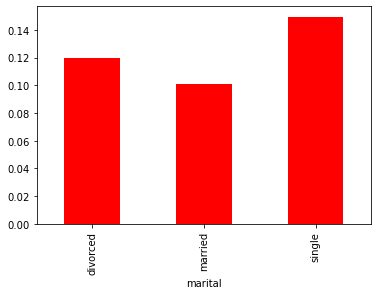

In [69]:
data.groupby(by='marital')['flag_response'].mean().plot.bar(color='red')

<AxesSubplot:xlabel='loan'>

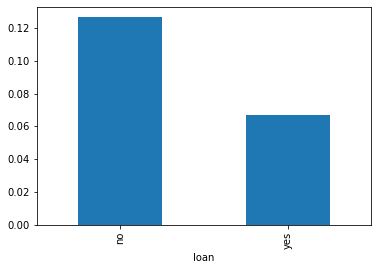

In [70]:
data.groupby(by='loan')['flag_response'].mean().plot.bar()

In [71]:
### Age vs Response

<AxesSubplot:xlabel='response', ylabel='age'>

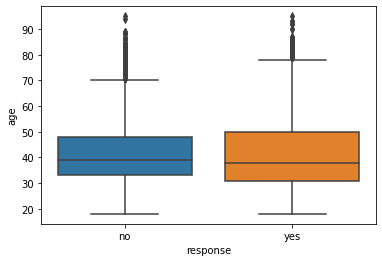

In [72]:
sns.boxplot(data=data , x='response',y='age')

In [73]:
?pd.cut

In [74]:
data['age_group']= pd.cut(data.age,[0,30,40,50,60,99999],labels=["<30","30-40","40-50","50-60","60+"])

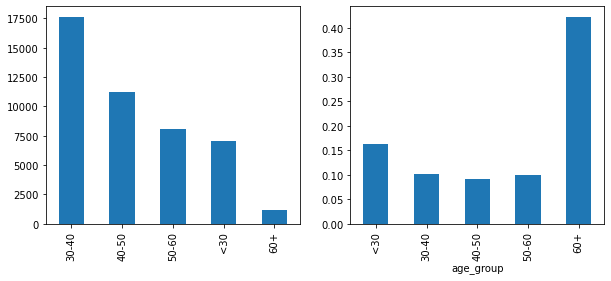

In [81]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
data.age_group.value_counts().plot.bar()
plt.subplot(1,2,2)
data.groupby(by='age_group')['flag_response'].mean().plot.bar()
plt.show()

0.1170257523084077

In [85]:
### MOre than 2 variable


In [88]:

res=pd.pivot_table(data=data,index='education',columns='marital',values='flag_response')
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


<AxesSubplot:xlabel='marital', ylabel='education'>

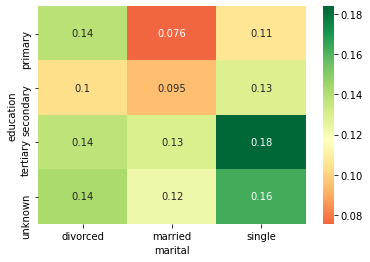

In [99]:
sns.heatmap(data=res,annot=True,cmap='RdYlGn',center=.117)

In [98]:
data['flag_response'].mean()

0.1170257523084077

In [101]:
# marital job vs marital response

In [103]:
res2=pd.pivot_table(data=data,index = 'job',columns='marital',values='flag_response')

<AxesSubplot:xlabel='marital', ylabel='job'>

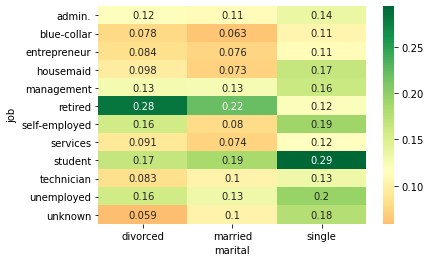

In [110]:
sns.heatmap(data=res2,annot=True,cmap='RdYlGn',center=.117)